# Step 2: Apply classical ML models

In [1]:
from config import models_isot_path
from helpers.metrics_plot import classification_summary

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import joblib



In [2]:
news = pd.read_csv("data/isot_news.csv")


X_train, X_test, y_train, y_test = train_test_split(news['text'], news['label'], test_size=0.2, random_state=42)


## Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0    0.99035   0.97976   0.98503      3458
           1    0.98373   0.99226   0.98798      4265

    accuracy                        0.98666      7723
   macro avg    0.98704   0.98601   0.98650      7723
weighted avg    0.98669   0.98666   0.98666      7723



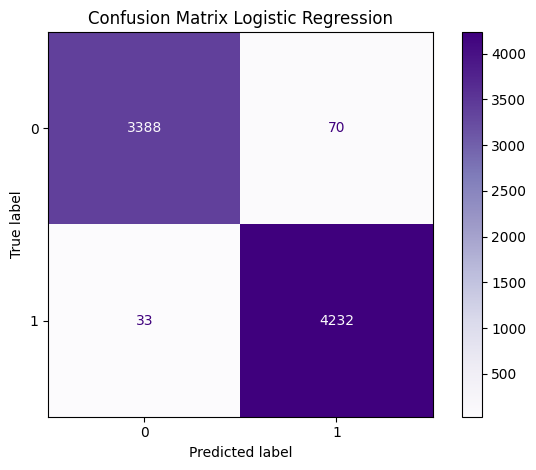

In [3]:
lr = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression())
])

lr.fit(X_train, y_train)

joblib.dump(lr, f'{models_isot_path}/logistic_regression.pkl')


pipeline = joblib.load(f'{models_isot_path}/logistic_regression.pkl')
y_pred = pipeline.predict(X_test)

classification_summary(y_test, y_pred, title="Confusion Matrix Logistic Regression")


## Naive Bayes

Classification Report:
              precision    recall  f1-score   support

           0    0.98116   0.84355   0.90717      3458
           1    0.88611   0.98687   0.93378      4265

    accuracy                        0.92270      7723
   macro avg    0.93363   0.91521   0.92047      7723
weighted avg    0.92867   0.92270   0.92186      7723



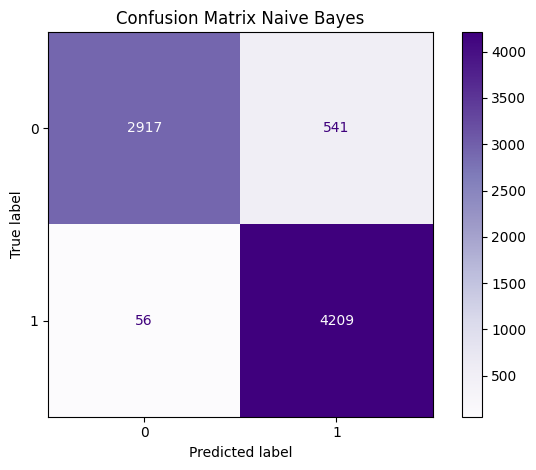

In [4]:
nb = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', MultinomialNB())
])

nb.fit(X_train, y_train)
joblib.dump(nb, f'{models_isot_path}/naive_bayes.pkl')

y_pred = nb.predict(X_test)

classification_summary(y_test, y_pred, title="Confusion Matrix Naive Bayes")


## Random Forest

Classification Report:
              precision    recall  f1-score   support

           0    0.99202   0.97108   0.98144      3458
           1    0.97695   0.99367   0.98524      4265

    accuracy                        0.98356      7723
   macro avg    0.98449   0.98238   0.98334      7723
weighted avg    0.98370   0.98356   0.98354      7723



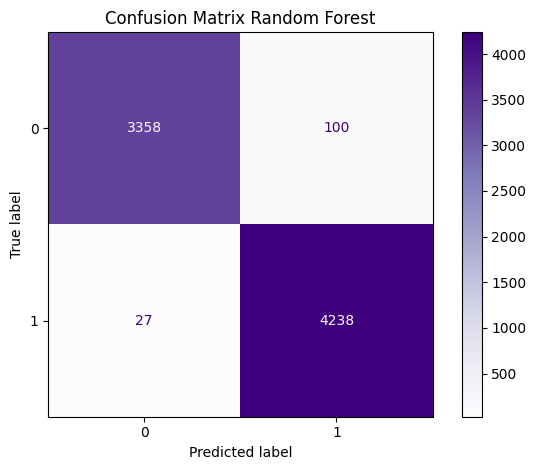

In [5]:
rf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', RandomForestClassifier())
])

rf.fit(X_train, y_train)
joblib.dump(rf, f'{models_isot_path}/random_forest.pkl')

y_pred = rf.predict(X_test)

classification_summary(y_test, y_pred, title="Confusion Matrix Random Forest")


## SVM

Classification Report:
              precision    recall  f1-score   support

           0    0.99592   0.98814   0.99202      3458
           1    0.99045   0.99672   0.99357      4265

    accuracy                        0.99288      7723
   macro avg    0.99318   0.99243   0.99279      7723
weighted avg    0.99290   0.99288   0.99288      7723



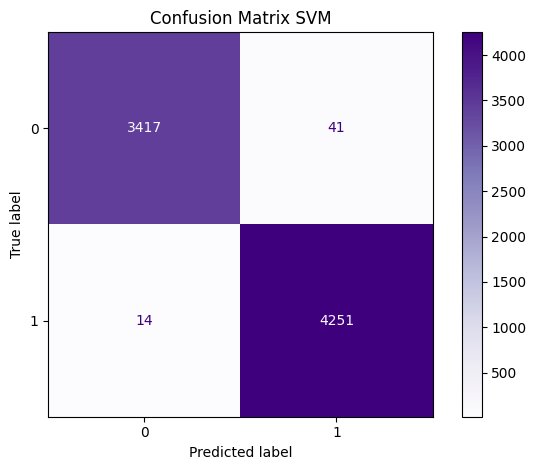

In [6]:
svm = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', SVC(kernel='linear'))
])

svm.fit(X_train, y_train)
joblib.dump(svm, f'{models_isot_path}/svc_linear_kernel.pkl')

y_pred = svm.predict(X_test)

classification_summary(y_test, y_pred, title="Confusion Matrix SVM")
